In [2]:
!pip install opencv_python

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import load_model
import os
import numpy as np

%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

from io import BytesIO
from PIL import Image
from PIL import ImageOps


In [4]:
# cifar10 category label name
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

In [5]:
#transform to a format 
#the model can understand
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

In [7]:
'''
LOAD MODEL
'''

# use ResNet
model = load_model('cifar10_ResNet20v1_model.092.h5')

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\keras\engine\saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [36]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

# Push ■ Button!!
while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()
 
        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / frameratef
    except KeyboardInterrupt:
        vc.release()
        is_capturing = False


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
image1 = Image.fromarray(np.uint8(frame))

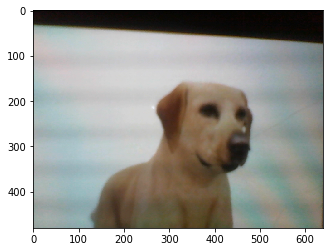

Captured image


In [38]:
plt.imshow(image1)
plt.show()
print("Captured image")

In [39]:
# resize cifar10 image size(32, 32)
image = Image.fromarray(np.uint8(frame))
image = image.resize((32, 32))

resize_frame = np.asarray(image)


In [40]:
'''
PREDICTING
'''

data = convertCIFER10Data(resize_frame)
 
ret = model.predict(data, batch_size=1) 
 


In [41]:
label=cifar10_labels[ret.argmax()]

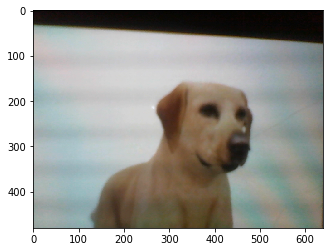

This is a :  dog


In [42]:
plt.imshow(image1)
plt.show()
print("This is a :  " + label)
 
